# **Q2) Salary_hike -> Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.**

EDA and Data Visualization. Correlation Analysis. Model Building. Model Testing. Model Predictions.

In [ ]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# import dataset
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
dataset=pd.read_csv("Salary_Data.csv")

In [ ]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#EDA and Data Visualization
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

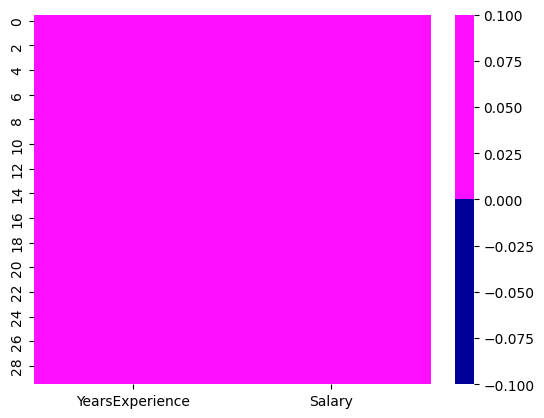

In [ ]:
#to genrate heat map
cols = dataset.columns
colors = ['#000099', '#ff0fff']   #define colors, magenta for missing, blue for non missing
sns.heatmap(dataset[cols].isnull(),
               cmap= sns.color_palette(colors))

In [ ]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x784f9f19acb0>,
 'caps': [<matplotlib.lines.Line2D at 0x784f9f19b1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x784f9f19aa10>],
 'medians': [<matplotlib.lines.Line2D at 0x784f9f19b730>],
 'fliers': [<matplotlib.lines.Line2D at 0x784f9f19b9d0>],
 'means': []}

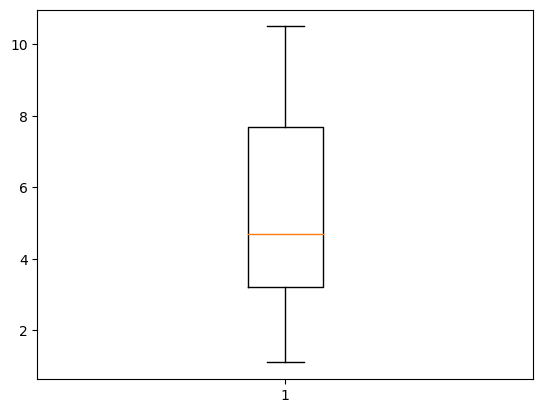

In [ ]:
#Outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(dataset['YearsExperience'])

<ipython-input-6-c16c18e1f77c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

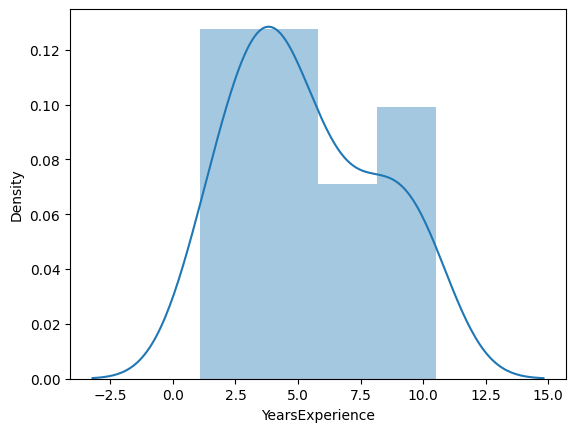

In [ ]:
sns.distplot(dataset['YearsExperience'])


{'whiskers': [<matplotlib.lines.Line2D at 0x784f9f0648b0>,
 'caps': [<matplotlib.lines.Line2D at 0x784f9f064df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x784f9f064610>],
 'medians': [<matplotlib.lines.Line2D at 0x784f9f065330>],
 'fliers': [<matplotlib.lines.Line2D at 0x784f9f0655d0>],
 'means': []}

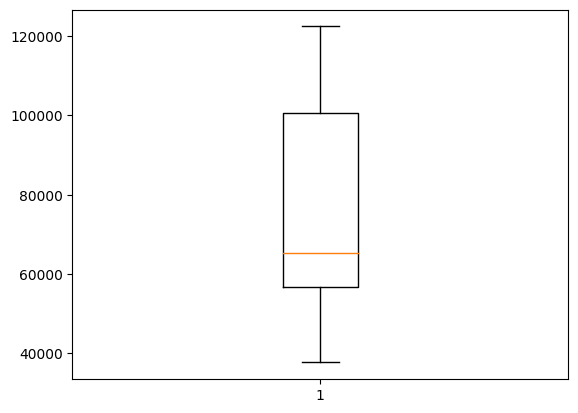

In [ ]:

plt.boxplot(dataset['Salary'])

<ipython-input-7-9fd6134c9331>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

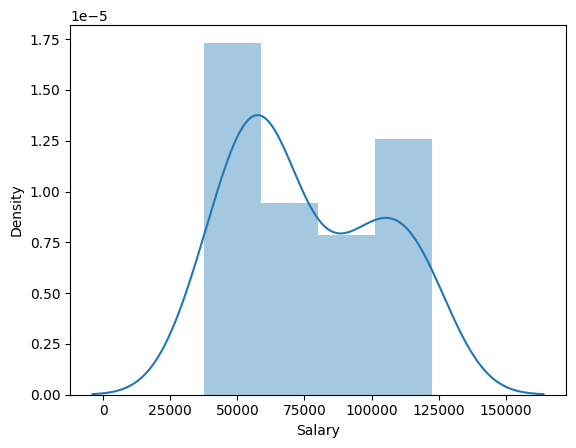

In [ ]:
sns.distplot(dataset['Salary'])


# **Feature Engineering**

**Performing Transformation on each column**

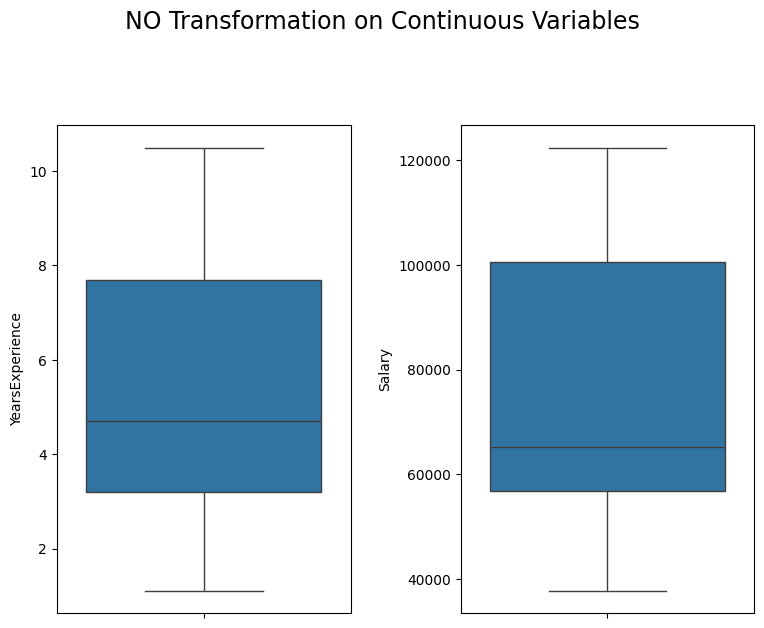

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot((dataset.YearsExperience), ax=ax[0])
sns.boxplot((dataset.Salary), ax=ax[1])
plt.suptitle("NO Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

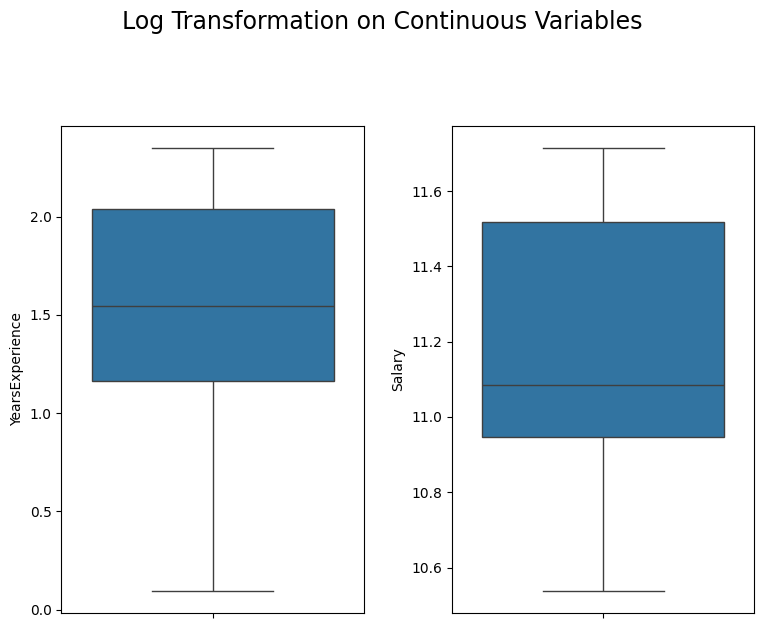

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot(np.log(dataset.YearsExperience), ax=ax[0])
sns.boxplot(np.log(dataset.Salary), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

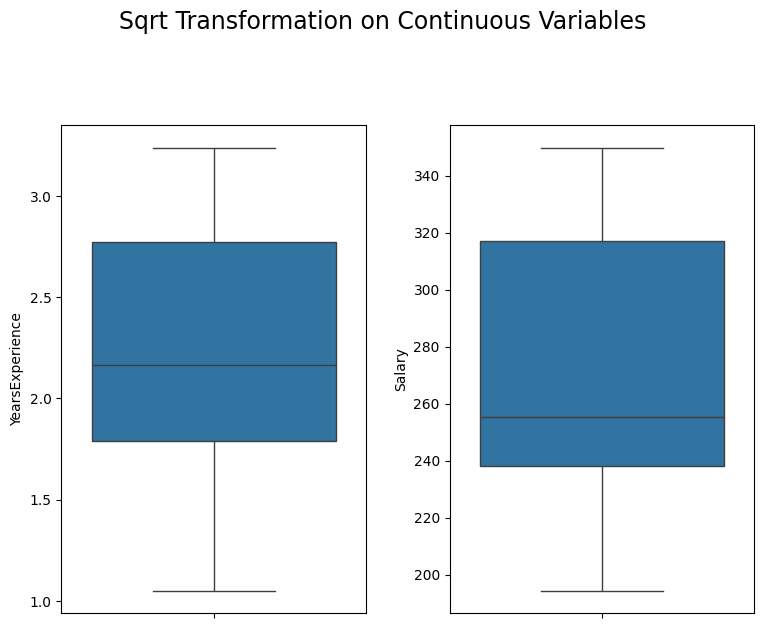

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(dataset.YearsExperience), ax=ax[0])
sns.boxplot(np.sqrt(dataset.Salary), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

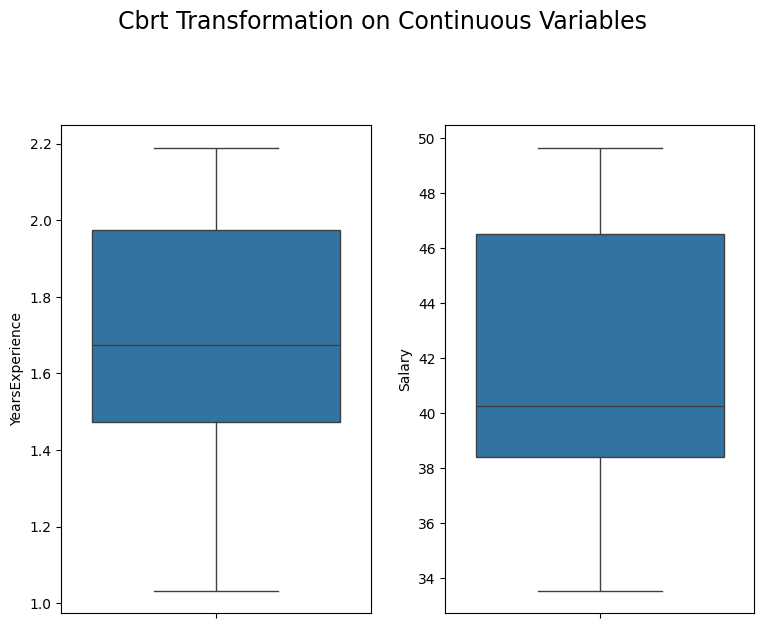

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(8,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(dataset.YearsExperience), ax=ax[0])
sns.boxplot(np.cbrt(dataset.Salary), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [ ]:
#Correlation Analysis
dataset.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


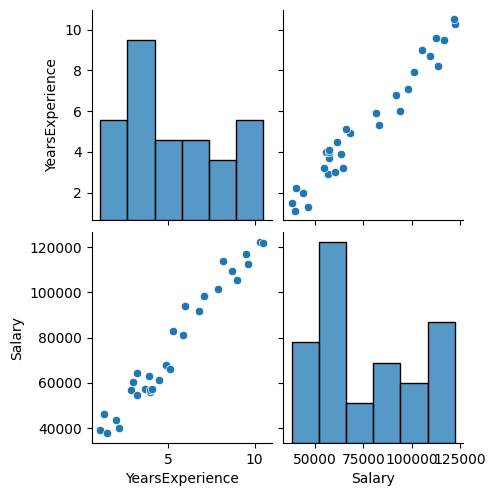

In [ ]:
sns.pairplot(dataset)


<Axes: xlabel='YearsExperience', ylabel='Salary'>

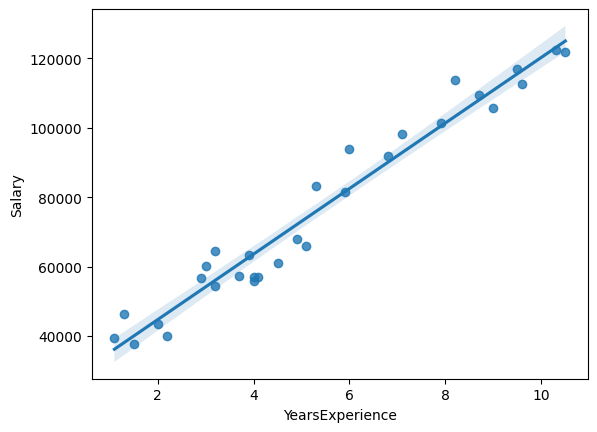

In [ ]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])


As you can see above
There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

In [ ]:
#Model Building
model=smf.ols("Salary~YearsExperience",data=dataset).fit()


In [ ]:
#Model Testing
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# **Model Predictions**


In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        08:28:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As you can notice in the above model
The R-squared and Adjusted R-squared scores are above 0.85.

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

F-statitics has gotten a little lower for this model than previous.

But log-likelihood got better than before close to 0 higher than previous model

and AIC and BIC score are now much better for this model

Lets Try some data transformation to check whether these scores can get any better than this.**

In [ ]:
import statsmodels.formula.api as sm
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           7.58e-19
Time:                        08:56:33   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           6.37e-18
Time:                        08:59:12   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           7.40e-16
Time:                        08:59:44   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

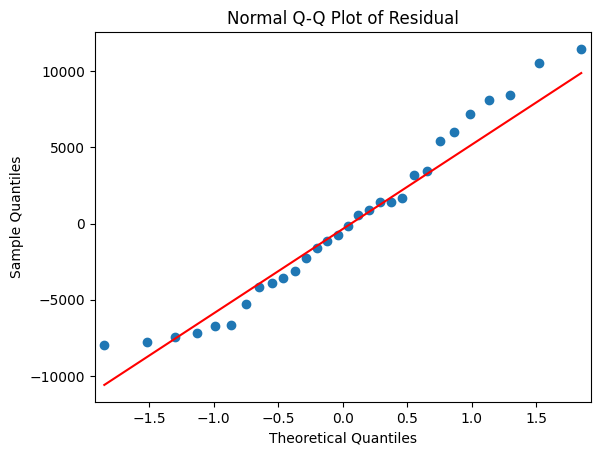

In [ ]:
#Residual Analysis

#Test for Noramlity of Residual through QQ plot

#q line is the 45 degrees line
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()

In [ ]:
list(np.where(model.resid>6))

[array([ 0,  1,  5,  6,  8, 10, 17, 19, 20, 21, 22, 23, 24, 26])]

***Residual plot for Homoscedasticity***

In [ ]:
def get_standardize_values( vals):
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

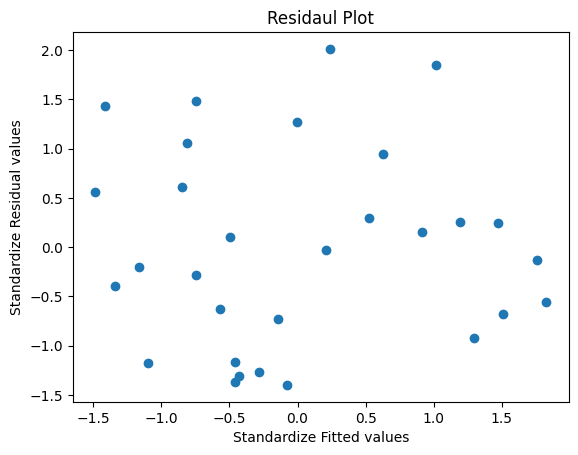

In [ ]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()


***Residual vs Regressors***

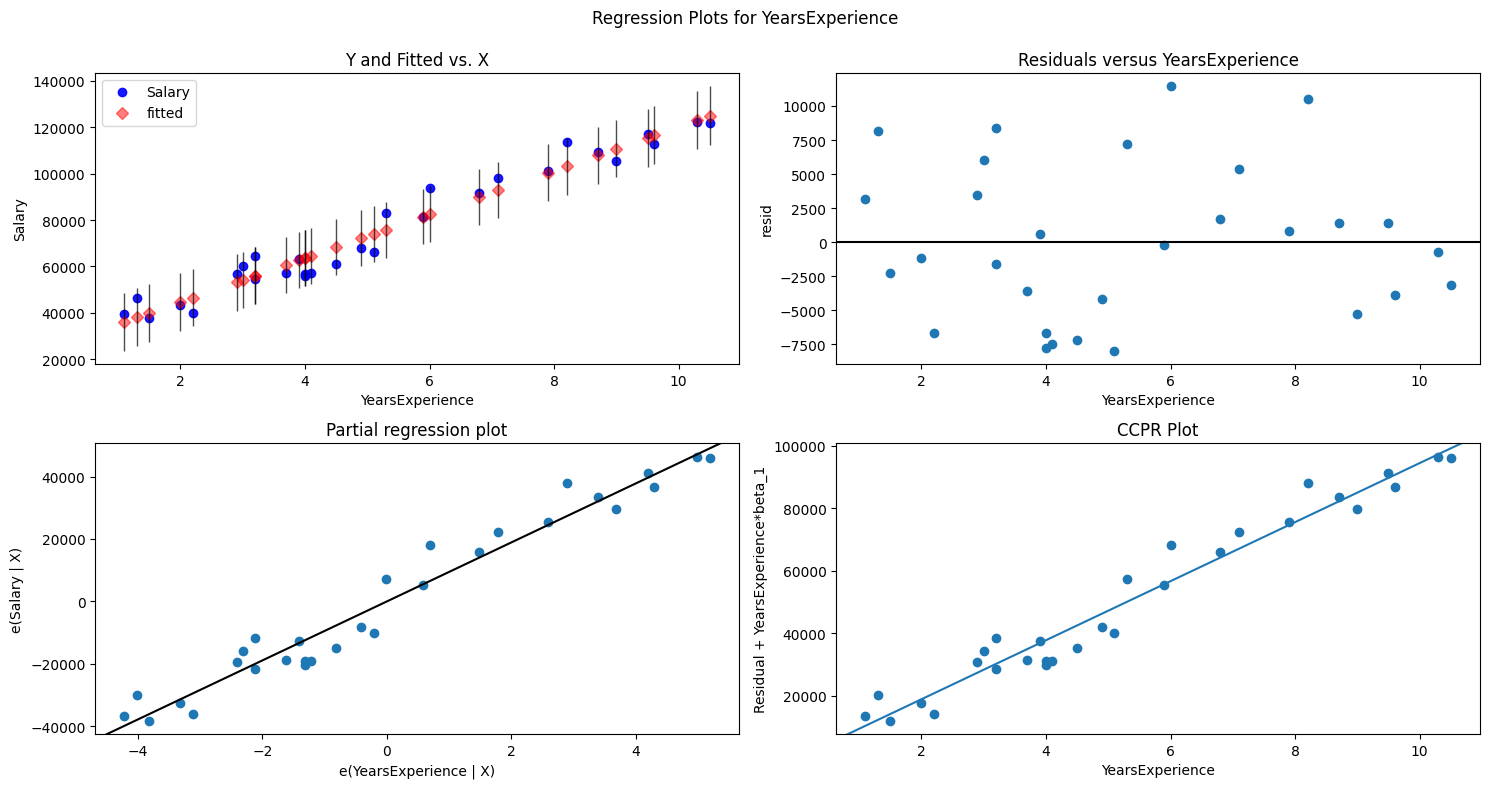

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "YearsExperience", fig=fig)
plt.show()


**Model Deletion by Cook's Distance and Leverage value**

In [ ]:

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

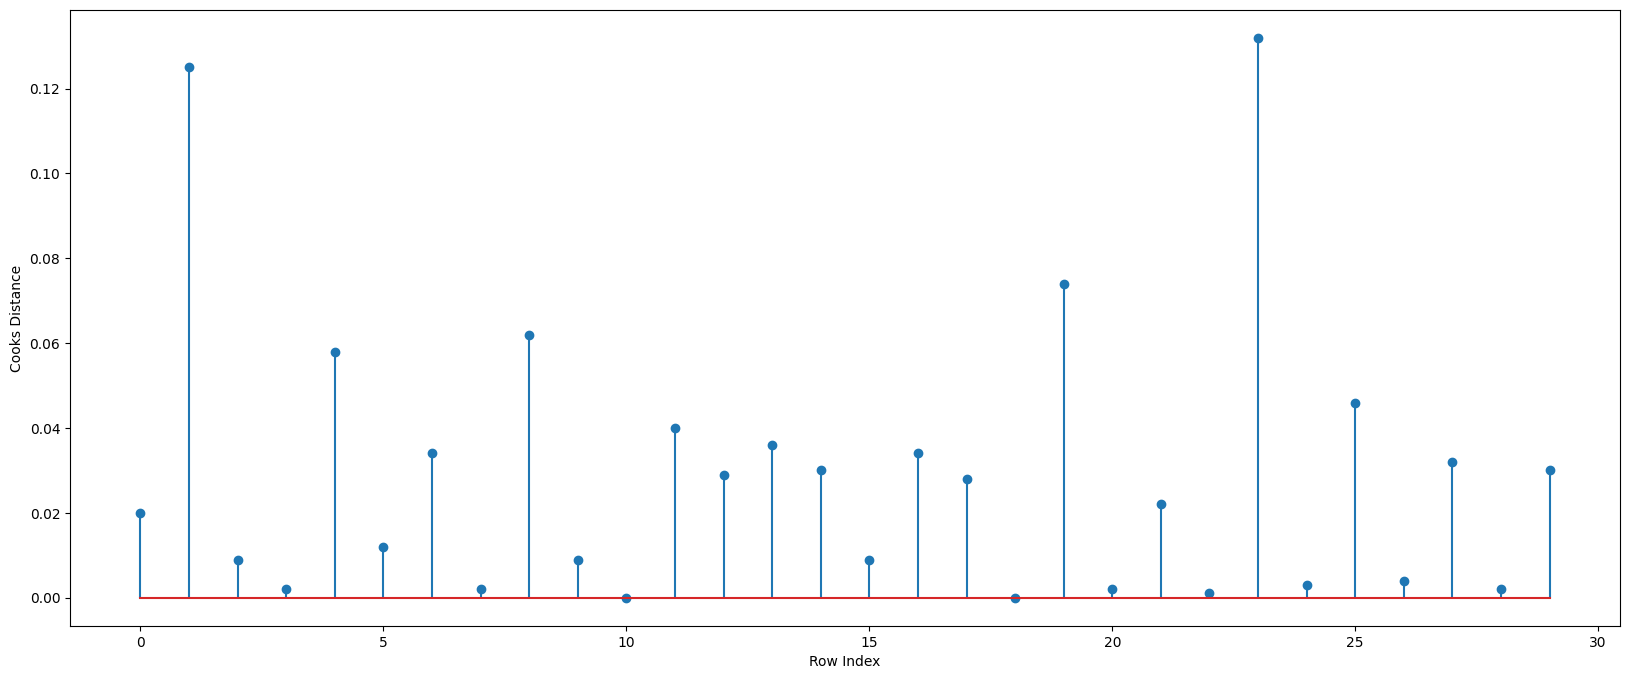

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(dataset)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [ ]:

#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(23, 0.13175452313135258)

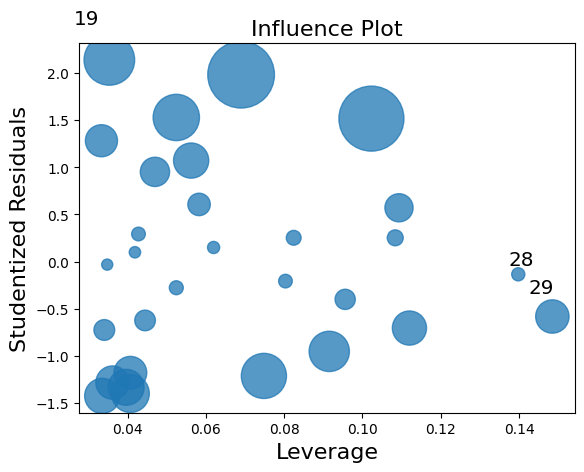

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = dataset.shape[1]
n = dataset.shape[0]
leverage_cutoff = 3*(k+1)/n

In [ ]:
leverage_cutoff

0.3

In [ ]:
##From the above plots, as C<1 & leverage_cutoff value is higher than any datapoint, hence we will not delete any datapoint.

# **Prediction**

In [ ]:
# Manual prediction for say 5 Years Experience
Salary = (25792.200199) + (9449.962321)*(5)
Salary

73042.01180400001

In [ ]:
# Automatic Prediction for say 5 & 10 Years Experience


In [ ]:
new_data=pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,10


In [ ]:
model.predict(data_pred)


0     73042.011806
1    120291.823413
dtype: float64

*END OF THE PROJECT fOR Q2*